# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# What are the typical libraries we import?
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [56]:
# Your code here.
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

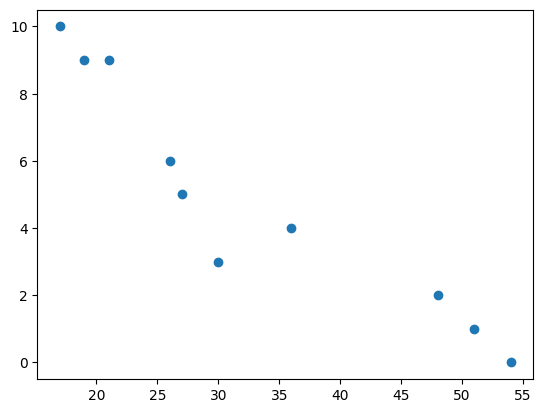

In [57]:
plt.scatter(student_data['Age'],student_data['Tardies'])
plt.show()

In [58]:
# Your code here.
px.scatter(x=student_data['Age'], y=student_data['Tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [59]:
# Your response here. 
#Yes definetely it exist a trend here!!!

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [60]:
# Your response here.

#correlation:
correlation = student_data['Age'].corr(student_data['Tardies'])


#covariance:
covariance = student_data['Age'].cov(student_data['Tardies'])

In [61]:
correlation


-0.9391626886887122

In [62]:
covariance

-45.56666666666666

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [63]:
# Your response here.
model = linear_model.LinearRegression()

Plot your regression model on your scatter plot.

In [64]:
# Your code here.
X = student_data.drop('Age',axis=1)
y = student_data['Age']

X.head()

,Tardies
0,10
1,1
2,5
3,9
4,4


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [65]:
# Your response here. 
result = model.fit(X,y)

print('intercept', result.intercept_)
print('Coeficeint', result.coef_)

intercept 50.69884853852967
Coeficeint [-3.63241807]


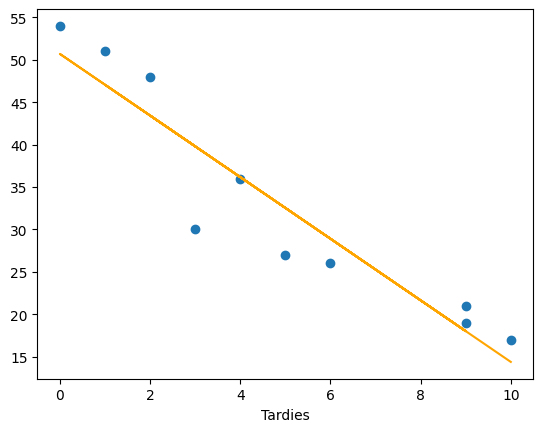

In [66]:
regression_line = result.intercept_ + student_data['Tardies']* result.coef_
plt.plot(student_data['Tardies'], regression_line, c='orange')

# Add line plot and scatter plot
plt.scatter(student_data['Tardies'], student_data['Age'])
plt.xlabel('Tardies')
plt.show()

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [67]:
# Import any libraries you may need & the data
df = pd.read_csv('vehicles.csv')
df

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


In [68]:
df.shape

(35952, 15)

In [69]:
df.dtypes

Make                        object
Model                       object
Year                         int64
Engine Displacement        float64
Cylinders                  float64
Transmission                object
Drivetrain                  object
Vehicle Class               object
Fuel Type                   object
Fuel Barrels/Year          float64
City MPG                     int64
Highway MPG                  int64
Combined MPG                 int64
CO2 Emission Grams/Mile    float64
Fuel Cost/Year               int64
dtype: object

In [70]:
df.isna().sum()

Make                       0
Model                      0
Year                       0
Engine Displacement        0
Cylinders                  0
Transmission               0
Drivetrain                 0
Vehicle Class              0
Fuel Type                  0
Fuel Barrels/Year          0
City MPG                   0
Highway MPG                0
Combined MPG               0
CO2 Emission Grams/Mile    0
Fuel Cost/Year             0
dtype: int64

In [71]:
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [72]:
numeric = df[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]

In [73]:
numeric

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,1984,4.0,19.388824,17,1950
1,1984,6.0,25.354615,13,2550
2,1985,4.0,20.600625,16,2100
3,1985,6.0,25.354615,13,2550
4,1987,6.0,20.600625,16,2550
...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100
35948,2014,3.0,9.155833,36,1100
35949,2015,3.0,9.155833,36,1100
35950,2016,3.0,9.155833,36,1100


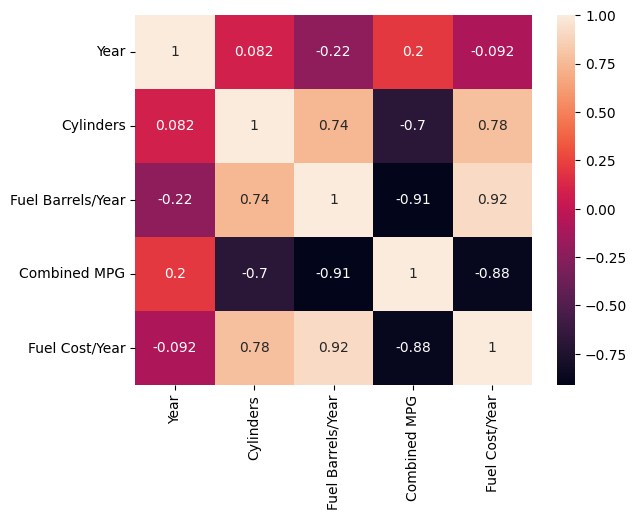

In [74]:
# Your response here. 
df_corr = numeric.corr()
sns.heatmap(df_corr, annot=True)
plt.show()

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [75]:
# Your response here. 
reg_model = numeric[['Fuel Barrels/Year','Cylinders']].dropna()
reg_model

,Fuel Barrels/Year,Cylinders
0,19.388824,4.0
1,25.354615,6.0
2,20.600625,4.0
3,25.354615,6.0
4,20.600625,6.0
...,...,...
35947,9.155833,3.0
35948,9.155833,3.0
35949,9.155833,3.0
35950,9.155833,3.0


In [88]:
X = reg_model.drop('Fuel Barrels/Year', axis=1)
y = reg_model['Fuel Barrels/Year']

In [89]:
X

,Cylinders
0,4.0
1,6.0
2,4.0
3,6.0
4,6.0
...,...
35947,3.0
35948,3.0
35949,3.0
35950,3.0


In [90]:
y

0        19.388824
1        25.354615
2        20.600625
3        25.354615
4        20.600625
           ...    
35947     9.155833
35948     9.155833
35949     9.155833
35950     9.155833
35951     9.417429
Name: Fuel Barrels/Year, Length: 35952, dtype: float64

In [91]:
model_car = linear_model.LinearRegression()
result_car = model_car.fit(X,y) 

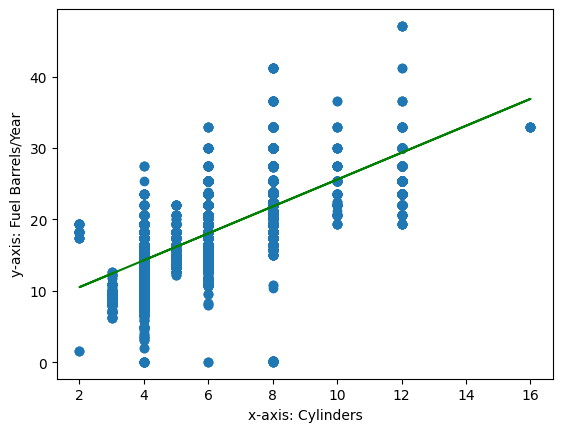

In [95]:
plt.scatter(x=X, y=y)
plt.xlabel('x-axis: Cylinders')
plt.ylabel('y-axis: Fuel Barrels/Year')

predictions = result_car.intercept_ + result_car.coef_ * X
plt.plot(X, predictions, '-', c='green')
plt.show()

In [96]:
model_car.score(X, y)

0.5468860517745212

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [97]:
# Your response here. 
"""
The 2 most inportants are the amount of cylinders and fuel per year, they have a good correlation,
and we can see clearly thata more cylinders more consume of fuel will be.
"""

'\nThe 2 most inportants are the amount of cylinders and fuel per year, they have a good correlation,\nand we can see clearly thata more cylinders more consume of fuel will be.\n'

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [100]:
# Your code here.
data1 = {'X':[1,3,4,6,8,9,11,14],
'Y':[1,2,4,4,5,7,8,13]}
lastdf = pd.DataFrame(data1)
lastdf

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [103]:
# Your code here.
px.scatter(lastdf)


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [105]:
# Your response here. 
X = lastdf.drop('Y',axis=1)
y = lastdf['Y']


In [106]:
result_last = model.fit(X,y)

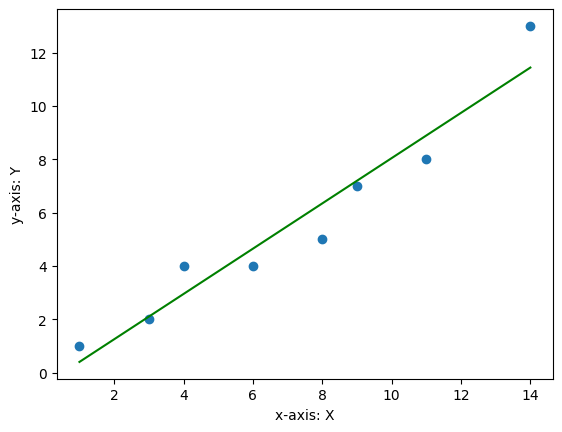

In [108]:
plt.scatter(x=X, y=y)
plt.xlabel('x-axis: X')
plt.ylabel('y-axis: Y')

predictions = result_last.intercept_ + result_last.coef_ * X
plt.plot(X, predictions, '-', c='green')
plt.show()

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [118]:
# Your response here. 
""" I havent, see any diference in the graphics, because there is no auliars,  
    the numbers are quite close, 
    and sample are to similar, quite hard to find any conections with it."""


' I havent, see any diference in the graphics, because there is no auliars,  \n    the numbers are quite close, \n    and sample are to similar, quite hard to find any conections with it.'